# Recurrent Neural Networks and Sentiment Analysis

Dans ce guide, nous examinerons les réseaux de neurones récurrents (RNN). Généralement, les RNN peuvent être utilisés pour n'importe quelle tâche où les données peuvent être représentées sous forme de séquence. Cela inclut des éléments tels que la prévision du cours des actions, en utilisant une série chronologique de données historiques représentées sous forme de séquence. Nous utilisons couramment les RNN en NLP car le texte peut être considéré comme une séquence de mots individuels et peut être modélisé comme tel. Alors qu'un réseau de neurones conventionnel prend un seul vecteur en entrée du modèle, un RNN peut prendre toute une séquence de vecteurs. Si nous représentons chaque mot d'un document sous la forme d'un vecteur , nous pouvons représenter un document entier sous la forme d'une séquence de vecteurs (ou d'un tenseur d'ordre 3). Nous pouvons ensuite utiliser des RNN (et une forme plus sophistiquée de RNN connue sous le nom de mémoire à long court terme (LSTM) pour apprendre de nos données.

dans ce guide, nous couvrirons les bases des RNN et du LSTM plus avancé. Nous examinerons ensuite l'analyse des sentiments et travaillerons sur un exemple pratique de la façon de créer un LSTM pour classer des documents à l'aide de PyTorch.

## Building RNNs

Les RNN sont constitués de couches récurrentes. Bien qu'elles soient similaires aux couches entièrement connectées au sein d'un réseau neuronal standard, ces couches récurrentes consistent en un état caché qui est mis à jour à chaque étape de l'entrée séquentielle. Cela signifie que pour toute séquence donnée, le modèle est initialisé avec un état caché, souvent représenté comme un vecteur unidimensionnel. La première étape de notre séquence est ensuite introduite dans notre modèle et l'état caché est mis à jour en fonction de certains paramètres appris. Le deuxième mot est ensuite introduit dans le réseau et l'état caché est à nouveau mis à jour en fonction d'autres paramètres appris. Ces étapes sont répétées jusqu'à ce que toute la séquence ait été traitée et qu'il nous reste l'état caché final. Cette boucle de calcul, avec l'état caché reporté du calcul précédent et mis à jour, est la raison pour laquelle nous appelons ces réseaux récurrents. Cet état caché final est ensuite connecté à une autre couche entièrement connectée et une classification finale est prédite.

Notre couche récurrente ressemble à ce qui suit, où h est l'état caché et x est notre entrée à différents pas de temps dans notre séquence. Pour chaque itération, nous mettons à jour notre état caché à chaque pas de temps, x :

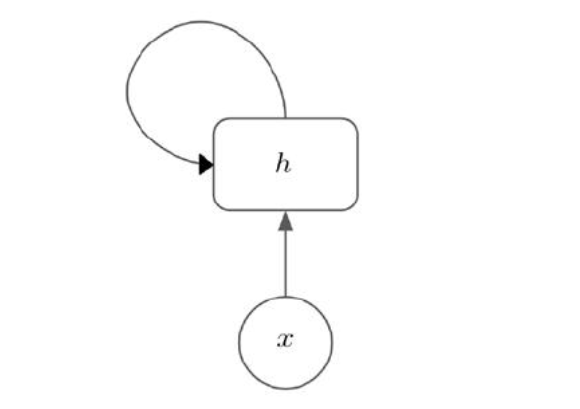



Alternativement, nous pouvons étendre cela à toute la séquence de pas de temps, qui ressemble à ceci :

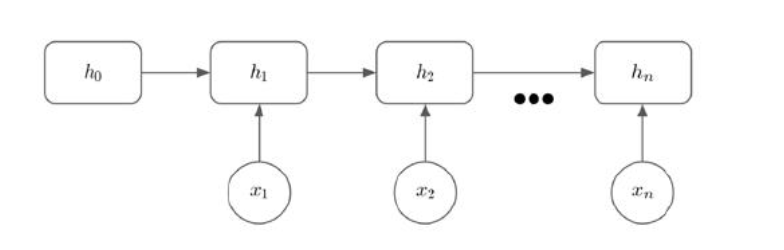

Cette couche est destinée à une entrée de n pas de temps. Notre état caché est initialisé dans l'état h0, puis utilise notre première entrée, x1, pour calculer le prochain état caché, h1. Il existe deux ensembles de matrices de poids qui sont également apprises : la matrice U, qui apprend comment l'état caché change entre les pas de temps, et la matrice W, qui apprend comment chaque étape d'entrée affecte l'état caché. Nous appliquons également une fonction d'activation tanh au produit résultant, en gardant les valeurs de l'état caché entre -1 et 1. L'équation pour calculer tout état caché, ht, devient la suivante:

$$h_t= tanh⁡(Wℎ_{t−1}+ Ux_t)$$

ceci est ensuite répété pour chaque pas de temps dans notre séquence d'entrée, et la sortie finale pour cette couche est notre dernier état caché, hn. Lorsque notre réseau apprend, nous effectuons un passage en avant à travers le réseau, comme auparavant, pour calculer notre classification finale. Nous calculons ensuite une perte par rapport à cette prédiction et nous nous propageons à travers le réseau, comme auparavant, en calculant les gradients au fur et à mesure. Ce processus de rétropropagation se produit à travers toutes les étapes de la couche récurrente, les paramètres entre chaque étape d'entrée et l'état caché étant appris.

Nous verrons plus loin que nous pouvons réellement prendre l'état caché à chaque pas de temps, plutôt que d'utiliser l'état caché final, ce qui est utile pour les tâches de traduction de séquence à séquence en NLP. Cependant, pour le moment, nous allons simplement prendre la couche cachée en sortie vers le reste du réseau

## Using RNNs for sentiment analysis

Dans le contexte de l'analyse des sentiments, notre modèle est entraîné sur un ensemble de données d'analyse des sentiments d'avis qui se compose d'un certain nombre d'avis sous forme de texte et d'une étiquette de 0 ou 1, selon que l'avis est négatif ou positif. Cela signifie que notre modèle devient une tâche de classification (où les deux classes sont négatives/positives). Notre phrase est passée à travers une couche de embadding de mots appris pour former une représentation de la phrase comprenant plusieurs vecteurs (un pour chaque mot). Ces vecteurs sont ensuite introduits séquentiellement dans notre couche RNN et l'état caché final est passé à travers une autre couche entièrement connectée. La sortie de notre modèle est une valeur unique comprise entre 0 et 1, selon que notre modèle prédit un sentiment négatif ou positif à partir de la phrase. Cela signifie que notre modèle de classification complet ressemble à ceci :

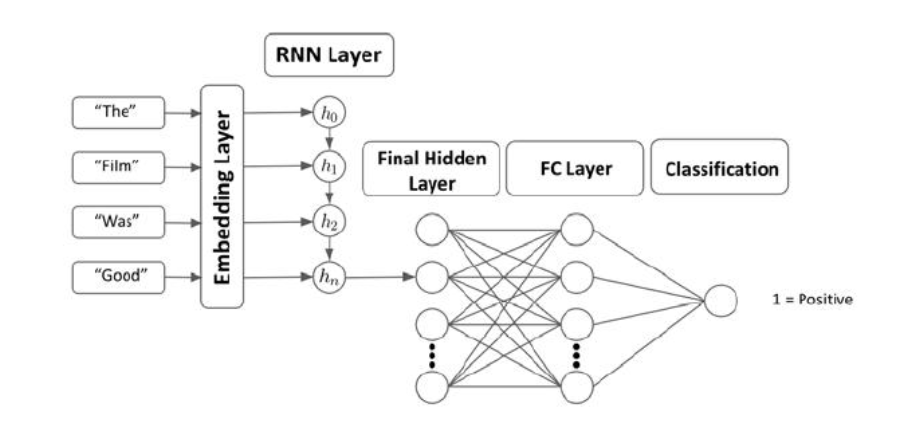

## Introducing LSTMs

Bien que les RNN nous permettent d'utiliser des séquences de mots en entrée de nos modèles, ils sont loin d'être parfaits. Les RNN souffrent de deux défauts principaux, qui peuvent être partiellement corrigés en utilisant une version plus sophistiquée du RNN, connue sous le nom de LSTM.

La structure de base des RNN signifie qu'il leur est très dicile de conserver des informations à long terme. Considérez une phrase de 20 mots. De notre premier mot de la phrase affectant l'état caché initial au dernier mot de la phrase, notre état caché est mis à jour 20 fois. Du début de notre phrase à notre état caché final, il est très dificile pour un RNN de retenir des informations sur les mots au début de la phrase. Cela signifie que les RNN ne sont pas très bons pour capturer les dépendances à long terme au sein des séquences. 

Considérons un long paragraphe où nous essayons de prédire le mot suivant. La phrase commence par J'étudie les mathématiques… et se termine par mon examen final est en…. Intuitivement, nous nous attendrions à ce que le mot suivant soit mathématique ou un domaine lié aux mathématiques. Cependant, dans un modèle RNN sur une longue séquence, notre état caché peut avoir du mal à conserver les informations pour le début de la phrase au moment où il atteint la fin de la phrase car il prend plusieurs étapes de mise à jour.

Nous devons également noter que les RNN sont médiocres pour capturer le contexte des mots dans une phrase dans son ensemble. en examinant les modèles n-grammes, que le sens d'un mot dans une phrase dépend de son contexte dans la phrase, qui est déterminé par les mots qui le précèdent et les mots qui le suivent. Dans un RNN, notre état caché se met à jour dans une seule direction. En une seule passe avant, notre état caché est initialisé et le premier mot de la séquence y est passé. Ce processus est ensuite répété avec tous les mots suivants dans la phrase de manière séquentielle jusqu'à ce qu'il nous reste notre état caché final. Cela signifie que pour un mot donné dans une phrase, nous n'avons considéré que l'effet cumulatif des mots qui l'ont précédé dans la phrase jusqu'à ce point. Nous ne prenons pas en compte les mots qui le suivent, ce qui signifie que nous ne capturons pas le contexte complet de chaque mot de la phrase.


Dans un autre exemple, nous voulons à nouveau prédire le mot manquant dans une phrase, mais il se produit maintenant vers le début plutôt qu'à la fin. Nous avons la phrase dans laquelle j'ai grandi… donc je peux parler couramment le néerlandais. Ici, nous pouvons intuitivement deviner que la personne a grandi aux Pays-Bas du fait qu'elle parle néerlandais. Cependant, comme un RNN analyse ces informations de manière séquentielle, il n'utiliserait que J'ai grandi dans… pour faire une prédiction, manquant l'autre contexte clé dans la phrase. Ces deux problèmes peuvent être partiellement résolus à l'aide des LSTM.


## Working with LSTMs

Les LSTM sont des versions plus avancées des RNN et contiennent deux propriétés supplémentaires : une porte de mise à jour et une porte d'oubli. Ces deux ajouts permettent au réseau d'apprendre plus facilement les dépendances à long terme. Considérez la critique de film suivante :

Le film était incroyable. Je suis allé le voir avec ma femme et mes filles mardi après-midi. Bien que je ne m'attendais pas à ce que ce soit très divertissant, cela s'est avéré être très amusant. Nous reviendrions certainement et le reverrons si l'occasion se présentait.


Dans l'analyse des sentiments, il est clair que tous les mots de la phrase ne sont pas pertinents pour déterminer s'il s'agit d'un avis positif ou négatif. Nous allons répéter cette phrase, mais cette fois en soulignant les mots pertinents pour évaluer le sentiment de la critique :

Le film était incroyable. Je suis allé le voir avec ma femme et mes filles mardi après-midi. Bien que je ne m'attendais pas à ce que ce soit très divertissant, cela s'est avéré être très amusant. Nous reviendrions sans hésiter et le revoir si l'occasion se présentait.

Les LSTM tentent de faire exactement cela : souvenez-vous des mots pertinents dans une phrase tout en oubliant toutes les informations non pertinentes. En faisant cela, il empêche les informations non pertinentes de diluer les informations pertinentes, ce qui signifie que les dépendances à long terme peuvent être mieux apprises sur de longues séquences.

Les LSTM ont une structure très similaire aux RNN. Bien qu'il existe un état caché qui est reporté entre les étapes au sein du LSTM, le fonctionnement interne de la cellule LSTM elle-même est différent de celui du RNN :




#LSTM cells
Alors qu'une cellule RNN prend simplement l'état caché précédent et la nouvelle étape d'entrée et calcule l'état caché suivant à l'aide de certains paramètres appris, le fonctionnement interne d'une cellule LSTM est considérablement plus compliqué :

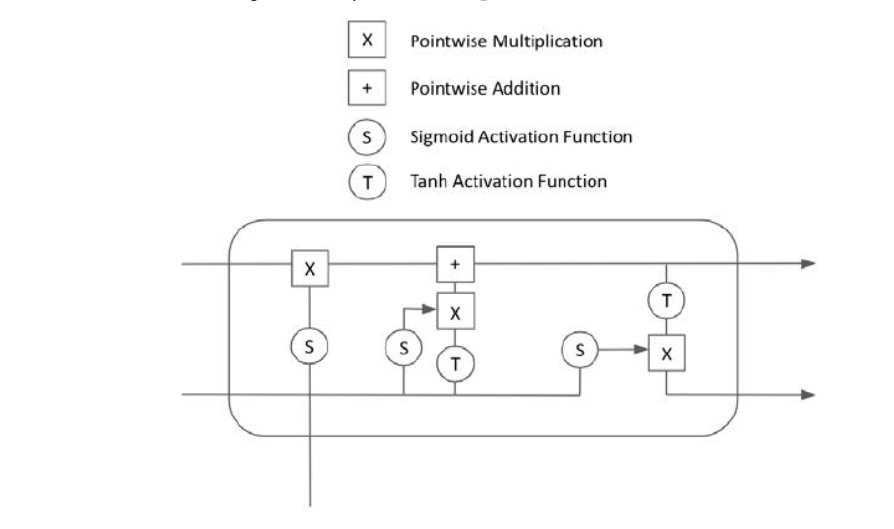

Bien que cela semble nettement plus intimidant que le RNN, nous expliquerons tour à tour chaque composant de la cellule LSTM. Nous allons d'abord regarder la porte de l'oubli (indiquée par le rectangle en gras)

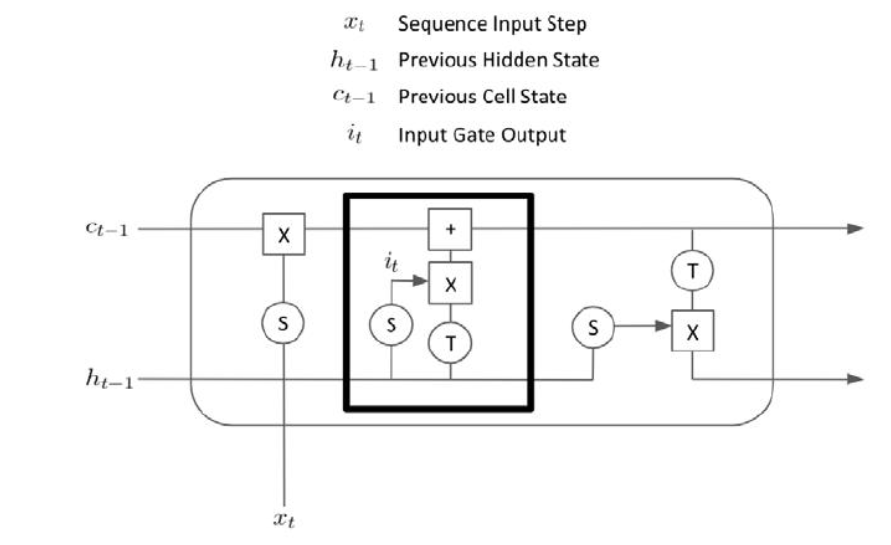

La porte d'entrée prend à nouveau l'état caché précédent concaténé, ht-1, et l'entrée de séquence actuelle, xt, et le fait passer par une fonction sigmoïde avec des paramètres appris, qui génère une autre matrice, $i_t$, constituée de valeurs comprises entre 0 et 1. L'état caché concaténé et l'entrée de séquence passent également par une fonction tanh, qui écrase la sortie entre -1 et 1. ceci est multiplié par la matrice $i_t$. cela signifie que les paramètres appris requis pour le générer apprennent eficacement quels éléments doivent être conservés à partir du pas de temps actuel dans notre état de cellule. Cela est ensuite ajouté à l'état actuel de la cellule pour obtenir notre état final de la cellule, qui sera reporté au prochain pas de temps.


Enfin, nous avons le dernier élément de la cellule LSTM - la porte de sortie:

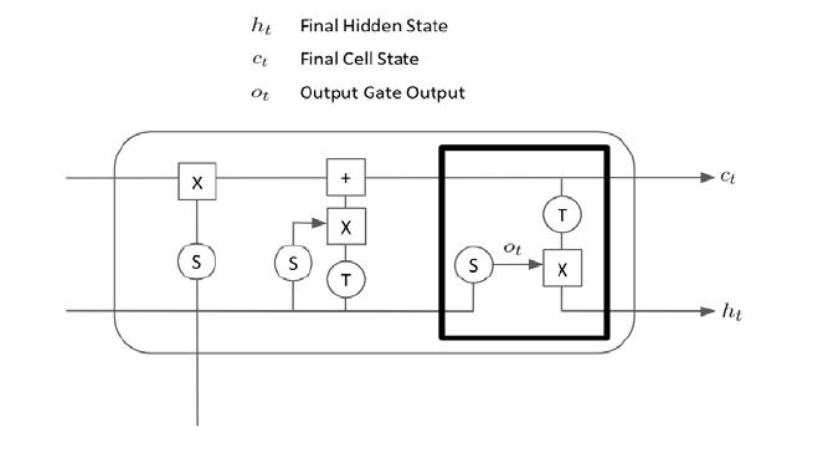




La porte de sortie calcule la sortie finale de la cellule LSTM, à la fois l'état de la cellule et l'état caché qui est reporté à l'étape suivante. L'état de la cellule, ct, est inchangé par rapport aux deux étapes précédentes et est un produit de la porte d'oubli et de la porte d'entrée. L'état caché final, ht, est calculé en prenant l'état caché précédent concaténé, ht-1, et l'entrée du pas de temps actuel, xt, et en passant par une fonction sigmoïde avec quelques paramètres appris pour obtenir la sortie de la porte de sortie, ot . L'état final de la cellule, ct, est passé par une fonction tanh et multiplié par la sortie de la porte de sortie, ot, pour calculer l'état caché final, ht. Cela signifie que les paramètres appris sur la porte de sortie contrôlent efficacement quels éléments de l'état caché précédent et de la sortie actuelle sont combinés avec l'état final de la cellule pour être transférés au pas de temps suivant en tant que nouvel état caché.

Dans notre passe avant, nous parcourons simplement le modèle, en initialisant notre état caché et notre état de cellule et en les mettant à jour à chaque pas de temps en utilisant les cellules LSTM jusqu'à ce que nous soyons laissés avec un état caché final, qui est transmis à la couche suivante de notre réseau de neurones. En rétropropageant à travers toutes les couches de notre LSTM, nous pouvons calculer les gradients relatifs à la perte du réseau et ainsi nous savons dans quelle direction mettre à jour nos paramètres par descente de gradient. Nous obtenons plusieurs matrices ou paramètres - une pour la porte d'entrée, une pour la porte de sortie et une pour la porte d'oubli.

Étant donné que nous obtenons plus de paramètres que pour un simple RNN et que notre graphique de calcul est plus complexe, le processus de rétropropagation à travers le réseau et de mise à jour des poids prendra probablement plus de temps que pour un simple RNN. Cependant, malgré le temps d'apprentissage plus long, nous avons montré que LSTM offre des avantages significatifs par rapport à un RNN conventionnel car la porte de sortie, la porte d'entrée et la porte d'oubli se combinent toutes pour donner au modèle la capacité de déterminer quels éléments de l'entrée doit être utilisé pour mettre à jour l'état caché et quels éléments de l'état caché doivent être oubliés à l'avenir, ce qui signifie que le modèle est mieux à même de former des dépendances à long terme et de conserver les informations des étapes de séquence précédentes.

## Bidirectional LSTMs

Nous avons mentionné précédemment qu'un inconvénient des RNN simples est qu'ils ne parviennent pas à capturer le contexte complet d'un mot dans une phrase car ils sont uniquement rétrospectifs. A chaque pas de temps du RNN, seuls les mots vus précédemment sont pris en compte et les mots apparaissant ensuite dans la phrase ne sont pas pris en compte. Alors que les LSTM de base sont également orientés vers l'arrière, nous pouvons utiliser une version modifiée de LSTM, connue sous le nom de LSTM bidirectionnel, qui considère à la fois les mots avant et après à chaque pas de temps dans la séquence.

Les LSTM bidirectionnels traitent les séquences dans l'ordre normal et dans l'ordre inverse simultanément, en maintenant deux états cachés. Nous appellerons l'état caché avant ft et utiliserons rt pour l'état caché inverse

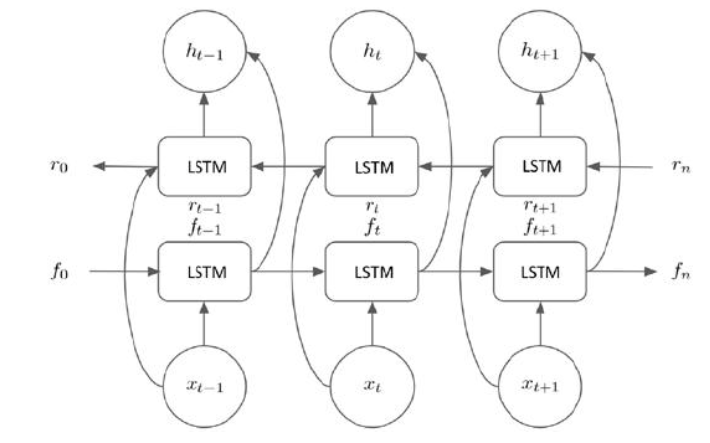

Ici, nous pouvons voir que nous maintenons ces deux états cachés tout au long du processus et les utilisons pour calculer un état caché final, ht. Par conséquent, si nous souhaitons calculer l'état caché final au pas de temps t, nous utilisons l'état caché avant, ft, qui a vu tous les mots et compris l'entrée xt, ainsi que l'état caché inverse, rt, qui a vu tous les mots après et compris xt. Par conséquent, notre état caché final, ht, comprend les états cachés qui ont vu tous les mots de la phrase, pas seulement les mots apparaissant avant le pas de temps t. Cela signifie que le contexte d'un mot donné dans la phrase entière peut être mieux saisi. Les LSTM bidirectionnels se sont avérés offrir des performances améliorées sur plusieurs tâches NLP par rapport aux LSTM unidirectionnels conventionnels.

## Building a sentiment analyzer using LSTMs

Nous allons maintenant voir comment construire notre propre LSTM simple pour catégoriser les phrases en fonction de leur sentiment. Nous entraînerons notre modèle sur un ensemble de données de 3 000 avis classés comme positifs ou négatifs. Ces avis proviennent de trois sources différentes : les avis sur les films, les avis sur les produits et les avis sur les emplacements, afin de garantir la robustesse de notre analyseur de sentiments. L'ensemble de données est équilibré de sorte qu'il se compose de 1 500 avis positifs et 1 500 avis négatifs. Nous allons commencer par importer notre jeu de données et l'examiner

In [1]:
import pandas as pd
from string import punctuation
import numpy as np
import torch
from nltk.tokenize import word_tokenize
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from torch import optim
import json

In [8]:
import urllib

# Get master directory
speech_dir ="https://github.com/PacktPublishing/Hands-On-Natural-Language-Processing-with-PyTorch-1.x/raw/master/Chapter05/sentiment%20labelled%20sentences/sentiment.txt/"

response = urllib.request.urlopen(speech_dir)
# Do what you need to with the speech
reviews  = response.read()
reviews  = reviews.decode("utf-8")

data = pd.DataFrame([review.split('\t') for review in reviews.split('\n')])

data.columns = ['Review','Sentiment']

data = data.sample(frac=1)

In [9]:
data.head()

,Review,Sentiment
267,"One of the best mexican movies ever!, and one ...",1
1741,It was way over fried.,0
1452,I am far from a sushi connoisseur but I can de...,0
2654,The charger arrived within the promised timefr...,0
2114,Absolutely great.,1


Nous lisons dans notre ensemble de données à partir du fichier. Notre ensemble de données est séparé par des tabulations, nous le divisons donc avec des tabulations et le caractère de nouvelle ligne. Nous renommons nos colonnes, puis utilisons la fonction sample pour mélanger aléatoirement nos données. En regardant notre ensemble de données, la première chose que nous devons pouvoir faire est de prétraiter nos phrases pour les alimenter dans notre modèle LSTM

## Preprocessing the data

Tout d'abord, nous créons une fonction pour tokeniser nos données, en divisant chaque avis en une liste de mots prétraités individuels. Nous parcourons notre ensemble de données et pour chaque comentaire, nous supprimons toute ponctuation, convertissons les lettres en minuscules et supprimons tout espace de fin. Nous utilisons ensuite le tokenizer NLTK pour créer des tokens individuels à partir de ce texte prétraité :






In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:

def split_words_reviews(data):
    text = list(data['Review'].values)
    clean_text = []
    for t in text:
        clean_text.append(t.translate(str.maketrans('', '', punctuation)).lower().rstrip())
    tokenized = [word_tokenize(x) for x in clean_text]
    all_text = []
    for tokens in tokenized:
        for t in tokens:
            all_text.append(t)
    return tokenized, set(all_text)

reviews, vocab = split_words_reviews(data)

reviews[0]

['one',
 'of',
 'the',
 'best',
 'mexican',
 'movies',
 'ever',
 'and',
 'one',
 'of',
 'the',
 'less',
 'understood',
 'even',
 'by',
 'mexican',
 'themselves',
 'no',
 'matter',
 'how',
 'identified',
 'the',
 'should',
 'have',
 'felt',
 'with',
 'it']

Nous renvoyons les critiques elles-mêmes, ainsi qu'un ensemble de tous les mots dans toutes les critiques (c'est-à-dire le vocabulaire/corpus), que nous utiliserons pour créer nos dictionnaires de vocabulaire.

Afin de bien préparer nos phrases à entrer dans un réseau de neurones, nous devons convertir nos mots en nombres. Pour ce faire, nous créons quelques dictionnaires, qui nous permettront de convertir des données de mot en index et d'index en mot. Pour ce faire, nous parcourons simplement notre corpus et attribuons un index à chaque mot unique :

In [13]:
def create_dictionaries(words):
    word_to_int_dict = {w:i+1 for i, w in enumerate(words)}
    int_to_word_dict = {i:w for w, i in word_to_int_dict.items()}
    return word_to_int_dict, int_to_word_dict

word_to_int_dict, int_to_word_dict = create_dictionaries(vocab)

int_to_word_dict

{1: 'memories',
 2: 'zillion',
 3: 'turned',
 4: '910',
 5: 'wow',
 6: 'otto',
 7: 'costs',
 8: 'unrecommended',
 9: 'shipped',
 10: 'honeslty',
 11: 'dealt',
 12: 'lies',
 13: 'women',
 14: 'narration',
 15: 'huevos',
 16: 'coppolas',
 17: 'peachykeen',
 18: 'pricing',
 19: 'without',
 20: 'beeping',
 21: 'masterpieces',
 22: 'powerful',
 23: 'nargile',
 24: 'don',
 25: '2005',
 26: 'alot',
 27: 'chase',
 28: 'magnificent',
 29: 'marriage',
 30: 'months',
 31: 'shed',
 32: 'indoors',
 33: 'ebay',
 34: 'thumper',
 35: 'jawbone',
 36: 'gristle',
 37: 'homework',
 38: 'wonderfully',
 39: 'shouldnt',
 40: 'amateurish',
 41: 'details',
 42: 'actingeven',
 43: 'connections',
 44: 'solidifying',
 45: 'entire',
 46: 'compelling',
 47: 'gallon',
 48: 'disliked',
 49: 'signal',
 50: 'past',
 51: 'stops',
 52: 'desired',
 53: 'blue',
 54: 'pace',
 55: 'involved',
 56: 'eloquently',
 57: 'usefulness',
 58: 'unconvincing',
 59: 'furthermore',
 60: 'integral',
 61: 'situations1',
 62: 'flawlessly',

Notre réseau de neurones prendra une entrée une longueur fixe ; Cependant, si nous explorons nos critiques, nous verrons que nos critiques sont toutes de longueurs différentes. Afin de nous assurer que toutes nos entrées sont de la même longueur, nous allons remplir nos phrases d'entrée. Cela signifie essentiellement que nous ajoutons des jetons vides à des phrases plus courtes afin que toutes les phrases aient la même longueur. Nous devons d'abord décider de la longueur du padding que nous souhaitons implémenter. Nous calculons d'abord la longueur maximale d'une phrase dans nos commentaires d'entrée, ainsi que la longueur moyenne :

In [14]:
print(np.max([len(x) for x in reviews]))
print(np.mean([len(x) for x in reviews]))

70
11.783666666666667


Nous pouvons voir que la phrase la plus longue fait 70 mots et que la longueur moyenne de la phrase est de 11,78. Pour capturer toutes les informations de toutes nos phrases, nous voulons remplir toutes nos phrases afin qu'elles aient une longueur de 70. Cependant, utiliser des phrases plus longues signifie des séquences plus longues, ce qui rend notre couche LSTM plus profonde. Cela signifie que la formation du modèle prend plus de temps car nous devons rétropropager nos gradients à travers plus de couches, mais cela signifie également qu'un grand pourcentage de nos entrées serait simplement clairsemé et plein de jetons vides, ce qui rend l'apprentissage de nos données beaucoup moins efficace . Cela est illustré par le fait que la longeur maximale de notre phrase est beaucoup plus longue que la longeur moyenne de notre phrases. Afin de capturer la majorité de nos informations de phrase sans remplir inutilement nos entrées et les rendre trop clairsemées, nous choisissons d'utiliser une taille d'entrée de 50. Vous pouvez essayer d'utiliser différentes tailles d'entrée entre 20 et 70 pour voir comment cela affecte les performances de votre modèle.

Nous allons créer une fonction qui nous permet de remplir nos phrases afin qu'elles aient toutes la même taille. Pour les critiques plus courtes que la longueur de la séquence, nous les complétons avec des jetons vides. Pour les critiques plus longues que la longueur de la séquence, nous laissons simplement tomber tous les jetons dépassant la longueur maximale de la séquence :

In [15]:
def pad_text(tokenized_reviews, seq_length):
    
    reviews = []
    
    for review in tokenized_reviews:
        if len(review) >= seq_length:
            reviews.append(review[:seq_length])
        else:
            reviews.append(['']*(seq_length-len(review)) + review)
        
    return np.array(reviews)

padded_sentences = pad_text(reviews, seq_length = 50)

padded_sentences[0]

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', 'one', 'of', 'the', 'best', 'mexican',
       'movies', 'ever', 'and', 'one', 'of', 'the', 'less', 'understood',
       'even', 'by', 'mexican', 'themselves', 'no', 'matter', 'how',
       'identified', 'the', 'should', 'have', 'felt', 'with', 'it'],
      dtype='<U33')

Nous devons faire un ajustement supplémentaire pour permettre l'utilisation de jetons vides dans notre modèle. Actuellement, nos dictionnaires de vocabulaire ne savent pas comment convertir des jetons vides en nombres entiers à utiliser au sein de notre réseau. Pour cette raison, nous les ajoutons manuellement à nos dictionnaires avec l'index 0, ce qui signifie que les jetons vides recevront une valeur de 0 lorsqu'ils seront introduits dans notre modèle

In [17]:
int_to_word_dict[0] = ''
word_to_int_dict[''] = 0

Nous sommes maintenant presque prêts à commencer à entraîner notre modèle. Nous effectuons une dernière étape de prétraitement et encodons toutes nos phrases sous forme de séquences numériques pour alimenter notre réseau de neurones. Cela signifie que la phrase complétée précédente ressemble maintenant à ceci :

In [18]:
encoded_sentences = np.array([[word_to_int_dict[word] for word in review] for review in padded_sentences])

encoded_sentences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  811, 3019, 5168, 2226, 4153, 1575, 5326, 3035,  811, 3019,
       5168, 3226, 2914, 2442, 2085, 4153, 4211, 3767, 2380, 1227,  701,
       5168, 4355,  989, 3613, 2961, 4831])

## Model architecture

Notre modèle sera composé de plusieurs parties principales. Outre les couches d'entrée et de sortie communes à de nombreux réseaux de neurones, nous aurons d'abord besoin d'une couche d' embadding. C'est pour que notre modèle apprenne les représentations vectorielles des mots sur lesquels il est entraîné. Nous pourrions choisir d'utiliser des intégrations précalculées (comme GLoVe), mais à des fins de démonstration, nous formerons notre propre couche d'intégration. Nos séquences d'entrée sont transmises à travers la couche d'entrée et sortent sous forme de séquences de vecteurs.

Ces séquences vectorielles sont ensuite introduites dans notre couche LSTM. Comme expliqué en détail plus haut dans ce guide, la couche LSTM apprend séquentiellement de notre séquence des embadding et génère une sortie vectorielle unique représentant l'état caché final de la couche LSTM. Cet état caché final est finalement passé à travers une couche cachée supplémentaire avant que le nœud de sortie final ne prédise une valeur entre 0 et 1, indiquant si la séquence d'entrée était un comonentaire positif ou négatif. Cela signifie que notre architecture de modèle ressemble à ceci :

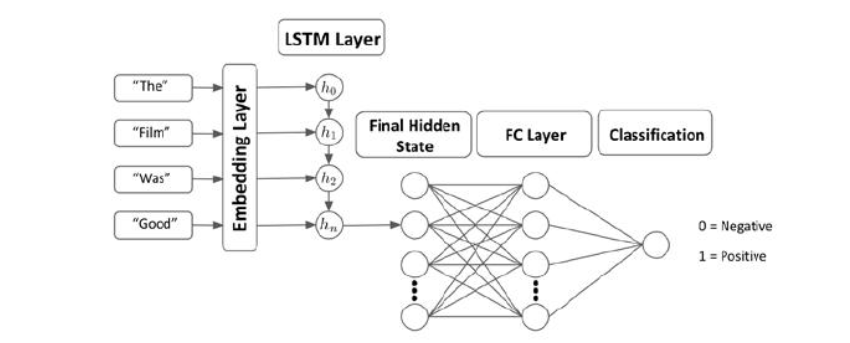

Nous allons maintenant montrer comment coder ce modèle à partir de zéro en utilisant PyTorch. Nous créons une classe appelée SentimentLSTM, qui hérite de la classe nn.Module. Nous définissons nos paramètres d'initialisation comme la taille de notre vocabulaire, le nombre de couches LSTM de notre modèle et la taille de l'état caché de notre modèle


Nous définissons ensuite chacune des couches de notre réseau. Tout d'abord, nous définissons notre couche d'intégration, qui aura la longueur du nombre de mots de notre vocabulaire et la taille des vecteurs d'intégration en tant qu'hyperparamètre n_embed à spécifier. Notre couche LSTM est définie en utilisant la taille du vecteur de sortie de la couche d'intégration, la longueur de l'état caché du modèle et le nombre de couches que notre couche LSTM aura. Nous ajoutons également un argument pour spécifier que notre LSTM peut être entraîné sur des lots de données et un argument pour nous permettre de mettre en œuvre la régularisation du réseau via dropout. Nous définissons une autre couche de dropout avec probabilité, drop_p (un hyperparamètre à spécifier lors de la création du modèle), ainsi que nos définitions de notre couche finale entièrement connectée et du nœud de sortie/prédiction (avec une fonction d'activation sigmoïde )



Ensuite, nous devons définir notre passe avant au sein de notre classe de modèle. Dans cette passe avant, nous enchaînons simplement la sortie d'une couche pour devenir l'entrée de notre couche suivante. Ici, nous pouvons voir que notre couche d'intégration prend input_words en entrée et sort les mots intégrés. en, notre couche LSTM prend les mots intégrés en entrée et sort lstm_out. La seule nuance ici est que nous utilisons view() pour remodeler nos tenseurs à partir de la sortie LSTM afin qu'ils soient de la bonne taille pour l'entrée dans notre couche entièrement connectée. Il en va de même pour remodeler la sortie de notre couche cachée pour qu'elle corresponde à celle de notre nœud de sortie. Notez que notre sortie renverra une prédiction pour classe = 0 et classe = 1, donc nous découpons la sortie pour ne renvoyer qu'une prédiction pour classe = 1 - c'est-à-dire la probabilité que notre phrase soit positive


Nous définissons également une fonction appelée init_hidden(), qui initialise notre couche cachée avec les dimensions de notre taille de lot. Cela permet à notre modèle de s'entraîner et de prédire sur plusieurs phrases à la fois, plutôt que de simplement s'entraîner sur une phrase à la fois, si nous le souhaitons. Notez que nous définissons ici le périphérique comme "cpu" pour l'exécuter sur notre processeur local. Cependant, il est également possible de définir cela sur un GPU compatible CUDA afin de l'entraîner sur un GPU si vous en avez un

In [19]:

class SentimentLSTM(nn.Module):
    def __init__(self, n_vocab, n_embed, n_hidden, n_output, n_layers, drop_p = 0.8):
        super().__init__()
        self.n_vocab = n_vocab  
        self.n_layers = n_layers 
        self.n_hidden = n_hidden 
        self.embedding = nn.Embedding(n_vocab, n_embed)
        self.lstm = nn.LSTM(n_embed, n_hidden, n_layers, batch_first = True, dropout = drop_p)
        self.dropout = nn.Dropout(drop_p)
        self.fc = nn.Linear(n_hidden, n_output)
        self.sigmoid = nn.Sigmoid()
        
        
    def forward (self, input_words):
        embedded_words = self.embedding(input_words)
        lstm_out, h = self.lstm(embedded_words) 
        lstm_out = self.dropout(lstm_out)
        lstm_out = lstm_out.contiguous().view(-1, self.n_hidden)
        fc_out = self.fc(lstm_out)                  
        sigmoid_out = self.sigmoid(fc_out)              
        sigmoid_out = sigmoid_out.view(batch_size, -1)  
        sigmoid_last = sigmoid_out[:, -1]
        return sigmoid_last, h
    
    
    def init_hidden (self, batch_size):
        
        device = "cpu"
        weights = next(self.parameters()).data
        h = (weights.new(self.n_layers, batch_size, self.n_hidden).zero_().to(device),
             weights.new(self.n_layers, batch_size, self.n_hidden).zero_().to(device))
        
        return h

Nous initialisons ensuite notre modèle en créant une nouvelle instance de la classe SentimentLSTM. Nous passons la taille de notre vocabulaire, la taille de nos plongements, la taille de notre état caché, ainsi que la taille de sortie, et le nombre de couches dans notre LSTM :

In [32]:
n_vocab = len(word_to_int_dict)
n_embed = 50
n_hidden = 100
n_output = 1
n_layers = 2

net = SentimentLSTM(n_vocab, n_embed, n_hidden, n_output, n_layers)

## Training the model

Pour entraîner notre modèle, nous devons d'abord définir nos jeux de données. Nous entraînerons notre modèle à l'aide d'un ensemble de données d'entraînement, évaluerons notre modèle entraîné à chaque étape sur un ensemble de validation, puis enfin, mesurerons les performances finales de notre modèle à l'aide d'un ensemble de données de test. La raison pour laquelle nous utilisons un ensemble de test distinct de notre formation à la validation est que nous pouvons souhaiter affiner les hyperparamètres de notre modèle en fonction de la perte par rapport à l'ensemble de validation. Si nous faisons cela, nous pouvons finir par choisir les hyperparamètres qui ne sont optimaux en termes de performances que pour cet ensemble de données de validation particulier. Nous évaluons un temps final par rapport à un ensemble de tests pour nous assurer que notre modèle se généralise bien aux données qu'il n'a jamais vues auparavant à aucun moment de la boucle d'entraînement

Nous avons déjà défini nos entrées de modèle (x) comme encoded_sentences, mais nous devons également définir notre sortie de modèle (y). Nous le faisons simplement.

Ensuite, nous définissons nos ratios de formation et de validation. Dans ce cas, nous allons entraîner notre modèle sur 80% des données, valider sur 10% supplémentaires des données, et enfin, tester sur les 10% restants des données


Ensuite, nous utilisons ces ensembles de données pour créer des objets PyTorch DataLoader. DataLoader nous permet de traiter par lots nos ensembles de données avec le paramètre batch_size, ce qui permet de transmettre facilement différentes tailles de lots à notre modèle. Dans ce cas, nous allons rester simple et définir batch_size = 2, ce qui signifie que notre modèle sera formé 2  phrases, plutôt que d'utiliser des lots de données plus importants. Nous choisissons également de mélanger aléatoirement nos objets DataLoader afin que les données soient transmises à travers notre réseau de neurones dans un ordre aléatoire, plutôt que dans le même ordre à chaque époque, supprimant potentiellement tout résultat biaisé de l'ordre d'entraînement.

In [35]:

labels = np.array([int(x) for x in data['Sentiment'].values])

train_ratio = 0.8
valid_ratio = (1 - train_ratio)/2

total = len(encoded_sentences)
train_cutoff = int(total * train_ratio)
valid_cutoff = int(total * (1 - valid_ratio))

train_x, train_y = torch.Tensor(encoded_sentences[:train_cutoff]).long(), torch.Tensor(labels[:train_cutoff]).long()
valid_x, valid_y = torch.Tensor(encoded_sentences[train_cutoff : valid_cutoff]).long(), torch.Tensor(labels[train_cutoff : valid_cutoff]).long()
test_x, test_y = torch.Tensor(encoded_sentences[valid_cutoff:]).long(), torch.Tensor(labels[valid_cutoff:])

train_data = TensorDataset(train_x, train_y)
valid_data = TensorDataset(valid_x, valid_y)
test_data = TensorDataset(test_x, test_y)

batch_size = 2

train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(valid_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = True)

Maintenant que nous avons défini notre objet DataLoader pour chacun de nos trois ensembles de données, nous définissons notre boucle d'entraînement. Nous définissons d'abord un certain nombre d'hyperparamètres, qui seront utilisés dans notre boucle d'apprentissage. Plus important encore, nous définissons notre fonction de perte comme une entropie croisée binaire (car nous traitons de la prédiction d'une seule classe binaire) et nous définissons notre optimiseur comme Adam avec un taux d'apprentissage de 0,001. Nous définissons également notre modèle pour qu'il s'exécute sur un petit nombre d'époques (pour gagner du temps) et définissons clip = 5 pour définir notre découpage de dégradé

In [37]:
print_every = 1200
step = 0
n_epochs = 8
clip = 5  
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

Ici, nous entraînons simplement notre modèle pour un certain nombre d'époques, et pour chaque époque, nous initialisons d'abord notre couche cachée en utilisant le paramètre de taille de lot. Dans ce cas, nous définissons batch_size = 2 car nous n'entraînons notre modèle sur 2 phrase à la fois. Pour chaque lot de phrases d'entrée et d'étiquettes dans notre chargeur de train, nous mettons d'abord à zéro nos gradients (pour les empêcher de s'accumuler) et calculons les sorties de notre modèle en utilisant le passage avant de nos données en utilisant l'état actuel du modèle. À l'aide de cette sortie, nous calculons ensuite notre perte en utilisant la sortie prévue du modèle et les étiquettes correctes. Nous effectuons ensuite un rétro-passage de cette perte à travers notre réseau pour calculer les gradients à chaque étape. Ensuite, nous utilisons la fonction grad_clip_norm() pour découper nos dégradés car cela empêchera nos dégradés d'exploser, comme mentionné précédemment dans ce guide. Nous avons défini clip = 5, ce qui signifie que le gradient maximum à un nœud donné est 5. Enfin, nous mettons à jour nos poids en utilisant les gradients calculés lors de notre passage en arrière en appelant optimiser.step(). Si nous exécutons cette boucle par elle-même, nous entraînera notre modèle. Cependant, nous voulons évaluer les performances de notre modèle après chaque époque afin de déterminer ses performances sur un ensemble de données de validation.

In [38]:
for epoch in range(n_epochs):
    h = net.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        step += 1  
        net.zero_grad()
        output, h = net(inputs)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm(net.parameters(), clip)
        optimizer.step()
        
        if (step % print_every) == 0:            
            net.eval()
            valid_losses = []

            for v_inputs, v_labels in valid_loader:
                       
                v_output, v_h = net(v_inputs)
                v_loss = criterion(v_output.squeeze(), v_labels.float())
                valid_losses.append(v_loss.item())

            print("Epoch: {}/{}".format((epoch+1), n_epochs),
                  "Step: {}".format(step),
                  "Training Loss: {:.4f}".format(loss.item()),
                  "Validation Loss: {:.4f}".format(np.mean(valid_losses)))
            net.train()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  # Remove the CWD from sys.path while we load stuff.


Epoch: 1/8 Step: 1200 Training Loss: 0.3971 Validation Loss: 0.6317
Epoch: 2/8 Step: 2400 Training Loss: 0.2172 Validation Loss: 0.6046
Epoch: 3/8 Step: 3600 Training Loss: 0.0169 Validation Loss: 0.6749
Epoch: 4/8 Step: 4800 Training Loss: 1.1673 Validation Loss: 0.7251
Epoch: 5/8 Step: 6000 Training Loss: 0.0014 Validation Loss: 0.8722
Epoch: 6/8 Step: 7200 Training Loss: 0.1109 Validation Loss: 0.9425
Epoch: 7/8 Step: 8400 Training Loss: 0.0090 Validation Loss: 1.0922
Epoch: 8/8 Step: 9600 Training Loss: 0.0038 Validation Loss: 1.4836


Cela signifie qu'à la fin de chaque époque, notre modèle appelle net.eval() pour geler les poids de notre modèle et effectue une passe en avant en utilisant nos données comme avant. Notez que dropout n'est pas non plus appliqué lorsque nous sommes en mode d'évaluation. Cependant, cette fois, au lieu d'utiliser le chargeur de données d'entraînement, nous utilisons le chargeur de validation. En faisant cela, nous pouvons calculer la perte totale de l'état actuel du modèle sur notre ensemble de données de validation. Enfin, nous imprimons nos résultats et appelons net.train() pour dégeler les poids de notre modèle afin que nous puissions nous entraîner à nouveau à l'époque suivante

In [ ]:
# torch.save(net.state_dict(), 'model.pkl')

Après avoir entraîné notre modèle pour 9 époques, nous remarquons deux choses principales. Commençons par la bonne nouvelle : notre modèle apprend quelque chose ! Non seulement notre perte d'entraînement a diminué, mais nous pouvons également voir que notre perte sur l'ensemble de validation a diminué après chaque époque. Cela signifie que notre modèle est mieux à même de prédire le sentiment sur un ensemble de données  après seulement 9 époques ! La mauvaise nouvelle, cependant, c'est que notre modèle est massivement exagéré. Notre perte d'entraînement est bien inférieure à celle de notre perte de validation, ce qui montre que bien que notre modèle ait très bien appris à prédire l'ensemble de données d'entraînement, cela ne se généralise pas aussi bien à un ensemble de données de validation. Cela devait se produire car nous utilisons un très petit ensemble de données d'entraînement (seulement 2 400 phrases d'entraînement). Comme nous entraînons toute une couche d'intégration, il est possible que de nombreux mots n'apparaissent qu'une seule fois dans l'ensemble d'apprentissage et jamais dans l'ensemble de validation et vice versa, ce qui rend pratiquement impossible pour le modèle de généraliser toutes les différentes variétés de mots au sein de notre corpus. En pratique, nous espérons entraîner notre modèle sur un ensemble de données beaucoup plus vaste pour permettre à notre modèle d'apprendre à bien mieux généraliser. Nous avons également entraîné ce modèle sur une très courte période de temps et n'avons pas effectué de réglage d'hyperparamètres pour déterminer la meilleure itération possible de notre modèle. N'hésitez pas à essayer de modifier certains des paramètres du modèle (tels que le temps d'apprentissage, la taille de l'état caché, la taille d'intégration, etc.) afin d'améliorer les performances du modèle.



Bien que notre modèle ait surchargé, il a quand même appris quelque chose. Nous souhaitons maintenant évaluer notre modèle sur un ensemble de données de test nal. Nous effectuons un dernier passage sur les données à l'aide du chargeur de test que nous avons défini précédemment. Dans ce passage, nous parcourons toutes nos données de test et faisons des prédictions à l'aide de notre modèle final

In [ ]:
#net = SentimentLSTM(n_vocab, n_embed, n_hidden, n_output, n_layers)
#net.load_state_dict(torch.load('model.pkl'))

In [39]:
net.eval()
test_losses = []
num_correct = 0

for inputs, labels in test_loader:

    test_output, test_h = net(inputs)
    loss = criterion(test_output, labels)
    test_losses.append(loss.item())
    
    preds = torch.round(test_output.squeeze())
    correct_tensor = preds.eq(labels.float().view_as(preds))
    correct = np.squeeze(correct_tensor.numpy())
    num_correct += np.sum(correct)
    
print("Test Loss: {:.4f}".format(np.mean(test_losses)))
print("Test Accuracy: {:.2f}".format(num_correct/len(test_loader.dataset)))

Test Loss: 1.7200
Test Accuracy: 0.75


Nous comparons ensuite nos prédictions de modèle avec nos vraies étiquettes pour obtenir correct_tensor, qui est un vecteur qui évalue si chacune des prédictions de notre modèle était correcte. Nous additionnons ensuite ce vecteur et le divisons par sa longueur pour obtenir la précision totale de notre modèle. Ici, nous obtenons une précision de 76%. Bien que notre modèle soit certainement loin d'être parfait, étant donné notre très petit ensemble d'entraînement et notre temps d'entraînement limité, ce n'est pas mal du tout ! Cela sert simplement à illustrer à quel point les LSTM peuvent être utiles lorsqu'il s'agit d'apprendre à partir des données de la PNL. Ensuite, nous montrerons comment nous pouvons utiliser notre modèle pour faire des prédictions à partir de nouvelles données

In [40]:
def preprocess_review(review):
    review = review.translate(str.maketrans('', '', punctuation)).lower().rstrip()
    tokenized = word_tokenize(review)
    if len(tokenized) >= 50:
        review = tokenized[:50]
    else:
        review= ['0']*(50-len(tokenized)) + tokenized
    
    final = []
    
    for token in review:
        try:
            final.append(word_to_int_dict[token])
            
        except:
            final.append(word_to_int_dict[''])
        
    return final

Nous supprimons la ponctuation et les espaces de fin, convertissons les lettres en minuscules et segmentons notre phrase d'entrée comme auparavant. Nous complétons notre phrase en une séquence d'une longueur de 50, puis convertissons nos jetons en valeurs numériques à l'aide de notre dictionnaire précalculé. Notez que notre entrée peut contenir de nouveaux mots que notre réseau n'a jamais vus auparavant. Dans ce cas, notre fonction les traite comme des jetons vides.

In [74]:
def predict(review):
    net.eval()
    words = np.array([preprocess_review(review)])
    padded_words = torch.from_numpy(words)
    pred_loader = DataLoader(padded_words, batch_size = 1, shuffle = True)
    for x in pred_loader:
      output = net(x)[0].item()
    
    msg = "This is a positive review." if output >= 0.5 else "This is a negative review."
    print(msg)
    print('Prediction = ' + str(output))

In [75]:
predict("The film was good")

ValueError: ignored

In [ ]:
predict("It was not good")